In [17]:
#pip install matplotlib numpy imageio

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image, display
import os
import shutil

In [24]:
# 1. Define the original shape (a square) in homogeneous coordinates
# Each row represents a point [x, y, 1]
square = np.array([
    [-1, -1, 1],
    [ 1, -1, 1],
    [ 1,  1, 1],
    [-1,  1, 1],
    [-1, -1, 1]  # Close the square by returning to the first point
]).T

In [27]:
# 2. Transformation functions (translation, rotation, and scaling)
def translacion(tx, ty):
    """Returns a translation matrix to move points by (tx, ty)."""
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0,  1]
    ])

def rotacion(theta):
    """Returns a rotation matrix to rotate points by an angle theta (in radians)."""
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0,              0,             1]
    ])

def escala(sx, sy):
    """Returns a scaling matrix to stretch points along x by sx and y by sy."""
    return np.array([
        [sx, 0,  0],
        [0,  sy, 0],
        [0,  0,  1]
    ])


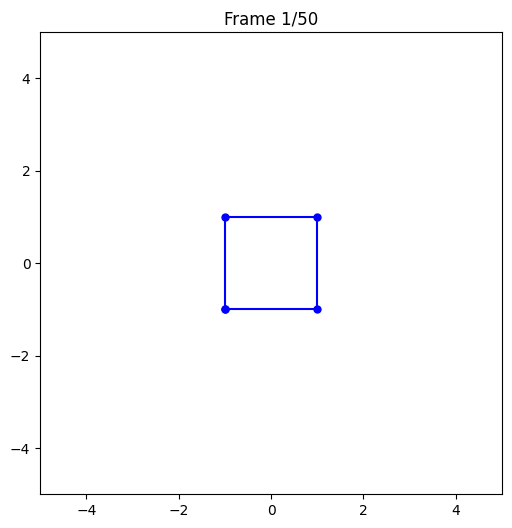

C:\Users\sergi\AppData\Local\Temp\ipykernel_11532\1928161195.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


GIF animado guardado como: transformaciones.gif


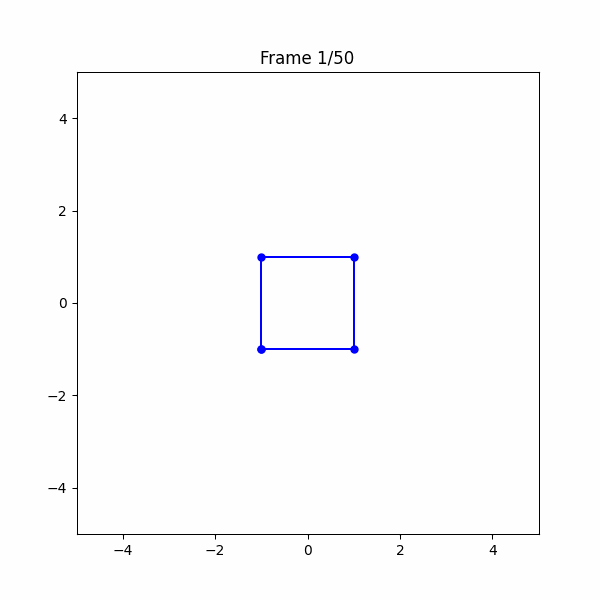

In [28]:
# 3. Set up the animation
frames = []        
num_frames = 50     # Number of animation frames

# Create a temporary folder to store the frames
temp_dir = "frames_temp"
if not os.path.exists(temp_dir):
    os.makedirs(temp_dir)

# Initial figure
fig, ax = plt.subplots(figsize=(6,6))

for i in range(num_frames):
    t = i / num_frames

    tx = 2 * np.sin(2 * np.pi * t)
    ty = 2 * np.sin(2 * np.pi * t)
    theta = 2 * np.pi * t
    s = 1 + 0.5 * np.sin(2 * np.pi * t)

    T = translacion(tx, ty)
    R = rotacion(theta)
    S = escala(s, s)

    M = T @ R @ S
    square_trans = M @ square

    ax.cla()
    ax.plot(square_trans[0, :], square_trans[1, :], 'bo-', markersize=5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_title(f'Frame {i+1}/{num_frames}')
    ax.set_aspect('equal', adjustable='box')

    filename = os.path.join(temp_dir, f"frame_{i}.png")
    fig.savefig(filename)
    plt.pause(0.01)

    frames.append(imageio.imread(filename))

# Export GIF
gif_filename = "transformaciones.gif"
imageio.mimsave(gif_filename, frames, fps=10, loop=0)
print("GIF animado guardado como:", gif_filename)

# Display GIF
display(Image(filename=gif_filename))

# Clean up
shutil.rmtree(temp_dir)